<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework4_part2_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4.2 (32 points)

**Learning objectives:**

In this assignment, we will delve deeper into linear dimensionality reduction, exploring connections between dimensionality reduction and classification. We will explore:

* Dimensionality reduction using LDA, and its relationship to PCA

---
Load our standard libraries:

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `pandas` as (`pd`)

Now is also a good time to set the default font size to 16.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 12})

---
## Part 1 (2 points)
For this assignment, we are going to analyze the somewhat famous ['wine analysis' dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). These data are the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents (e.g. alcohol, malic acid, etc.) found in each of the three types of wines.

Load the dataset: these data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework4/wine.csv'

*  Use the pandas function `pd.read_csv` to create a a `pandas` DataFrame, called `df`.

* Use `.head()` to take a look at the different features of the dataset.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


---
## Part 2 (2 points)

Let's get organized a bit. We are going to use LDA to do dimensionality reduction on our wine data. This dataset has 13 attributes, 178 samples, and 3 classes, so things can get confusing fast. Let's create seperate arrays for each class to make our life easier.

* Create 3 numpy arrays, `X1`, `X2` and `X3`, one for each data of class.

* Create a numpy vector `y` with the class labels.

* Create a numpy matrix `X` of the data for ALL classes.

---
## Part 3 (2 points)

With 13 dimensions in our dataset, we can't even visualize how the different classes cluster! Are they super tangled up? All spread out?

Let's say we didn't know anything about LDA yet, but we were super experts on PCA. Data got too many dimensions -- do PCA! That will solve the problem! Let's see...

* Compute the mean of the whole dataset (for all classes, i.e. `X`) and called it `m`.
* Compute the covariance matrix of `X` - `m` and call it `ST`.

<font color='red'>**NOTE: throughout this assignment, we will compute the covariance matrix of a data matrix `X` as C = $X^TX$ (or $XX^T$ when appropriate) without a normalization factor. This means that you need to compute it yourself using `np.dot` or `np.matmul`, without using `numpy.cov`. This isn't to punish you, but just because if your normalize these covariance matrices, you need to do so consistently across ALL of the analyses we do, and its just a pain if they are normalized - it's easier if they are not.** </font>  

* Compute the eigenvectors of `ST`.

* Project `X` - `m` down onto the first 2 PCs.

* Plot the data (with the mean removed) colored by class (class_0: `blue`, class_1: `red`, class_2: `green`) projected down onto the first 2 PCs. Add a legend so its clear which class is which.

Your plot should look like this. What a mess!

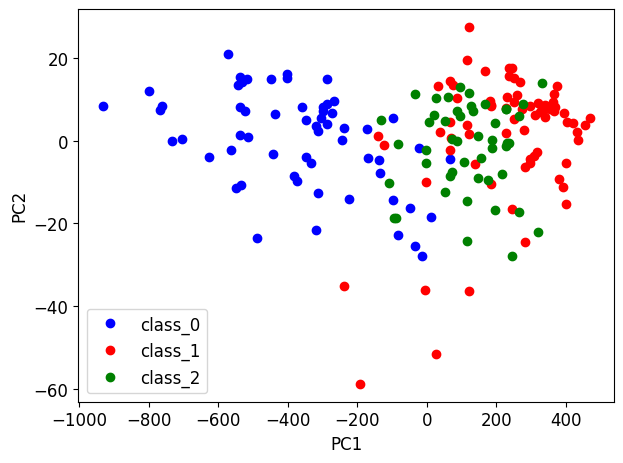

---
## Part 4 (2 points)

Maybe using some information about which class each datapoint is in will help us? Let's try doing PCA on the _mean_ value of each class. Maybe, if the mean values are super spread out, and each data point is not too far from its classes' mean, maybe the eigenvalues of the class means will be a good set of axes to project the data on?

* Compute the mean of the data within each class.

* Compute the covariance matrix of the class means. In class, this was defined as $$S_B = \sum_k N_k (m_k - m)(m_k - m)^T$$

where $N_k$ is the number of data points in the $k^{th}$ class and $m$ is the mean over all datapoints.

* In class, I noted that because $S_B$ is comprised of a sum of $K$ matrices that are constructed as vector [outer products](https://en.wikipedia.org/wiki/Outer_product) and because $\frac{1}{N}\sum_k N_k m_k = m$, the [rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)) of $S_B$ should be $K-1$, i.e. 2 in our case. Verify this.

---
## Part 5 (2 points)

Do PCA on the class mean covariance matrix.

* Compute the eigenvectors of `SB`.

* Project `X` - `m` down onto the first 2 PCs.

* Plot the data (with the mean removed) colored by class (class_0: `blue`, class_1: `red`, class_2: `green`) projected down onto the first 2 PCs. Add a legend so its clear which class is which.

Your plot should look like this. No such luck!

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


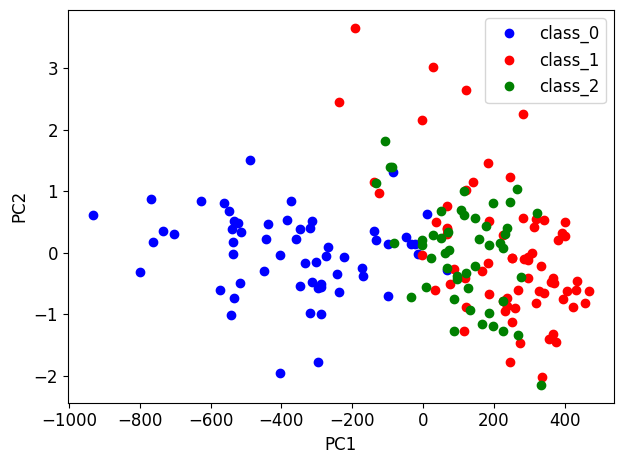

---
## Part 6 (2 points)

OK, clearly using the covariance of all the data (without any class information) OR only using the mean information for each class isn't going to cut it. In class, we learned how LDA projects the data down to a lower dimension such that 1. the distance between class means is large and 2. the within classes covariance is small.

Recall from class that the projection $W$ that does this can be computed by solving $$J(W) = Tr(\frac{W^TS_BW}{W^TS_WW}).$$

The solution yeilds that $W$ will be the eigenvectors of $S_W^{-1}S_B$.

We already computed `SB`. Let's compute `SW`, the within class covariance.

* Compute the within class covariance matrix by computing the covariance of the data in each class and summing each covariance matrix. Recall that the data for each class should have its class mean removed. I.e., compute $$\sum_k (X_k - m_k)(X_k - m_k)^T$$

* In class, we derived the expression for $S_B$ by noting that it should be the remaining variance when the within class variance is subtracted from the total data variance. Validate this is true for the `SB` you calculated above.

---
## Part 7 (2 points)

Let's finally do LDA.

* Compute the eigenvectors of $S_W^{-1}S_B$.

* Project `X` - `m` down onto the first 2 PCs.

* Plot the data (with the mean removed) colored by class (class_0: `blue`, class_1: `red`, class_2: `green`) projected down onto the first 2 PCs. Add a legend so its clear which class is which.

Your plot should look like this. Success!

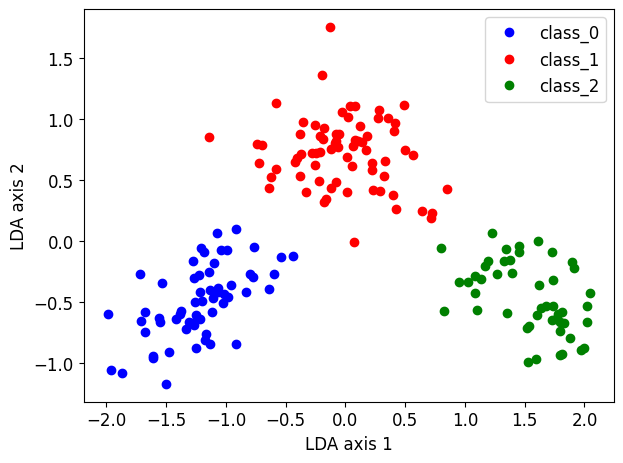

---
## Part 8 (2 points)

In class, I noted how the $S_W^{-1}$ term in the expression $S_W^{-1}S_B$ acts something like a 'filter': it 'corrects' the covariance of the data based on the class means alone by the covariance within classes. In HW 4.1 we z-scored our data, which can also be thought of as a filter on the data: each feature is demeaned and normalized (but no feature-feature covariance is considered). So perhaps we need a better straw man to compare LDA against, rather than simple PCA.

* Scale the data `X` using `sklearn.preprocessing` `StandardScaler` then do PCA, as above. Plot your results.

Your plot should look like this. Looks better than regular PCA, but LDA is still looking better!

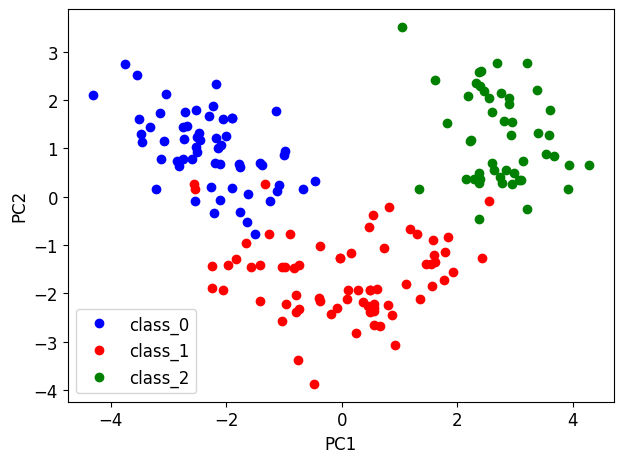

---
## Part 9 (2 points)

In HW 4.1, we plotted the entries of the first few eigenvectors from PCA. The values of these entries told us which combinations of features gave rise to PC1, PC2, etc. We can do this again here!

* Plot the loadings of PC1 from PCA and for the class mean covariance matrix and for the covariance matrix of all the data. Use the feature labels for the x-axis labels so we can see the weigtht of each feature. What do you notice about these loadings?

* Do the same for the PC1 loadings for PCA on the scaled data and for the first eigenvector of LDA. What do you notice about these loadings that's different?

Your plots should look like this.


/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


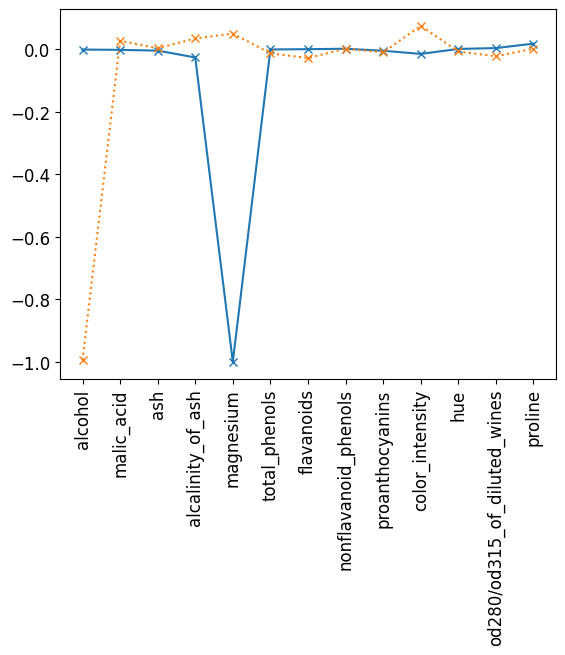

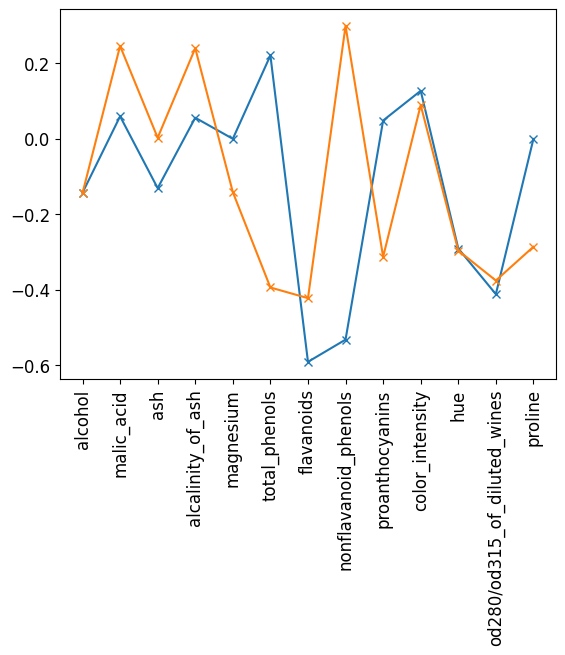

---
## Part 10 (2 points)

Now that we've used LDA and projected our data down to a 2D space where we can see what the class clusters look like, let's do classification on our dataset and see how much better we are doing when compared to the best we could have done with PCA (scaled PCA).

Although discriminant vectors for each class can be derived directly from $W$ after LDA is performed to do dimensionality reduction (see [here](https://scikit-learn.org/stable/modules/lda_qda.html#lda)) the linear algebra gets a bit hairy. Instead, we will perform 'one against the others' classification, where we compute three discriminant vectors: one for each class against all the data of any other class.

In this way, 'one against the others' is much like a two-class classifcation problem, and because we've projected our data down to 2D, this is exactly the same situation we dealt with in HW3.1!

However, in HW3.1, we derived the slope and midpoint of the discriminant line by hand, and this was somewhat tedious. `sklearn`'s function `LinearDiscriminantAnalysis` provides these values for free, so let's use them.

<font color='red'>**NOTE: In order to get the values of the slope and midpoint, we will have to fit an LDA model again to our reduced dimensional data, but because the data has already been reduced to K-1 (i.e. 2) dimensions, no further reduction will be possible. This is just a bit of hack to exploit the functionality of `sklearn`.** </font>

* Project all the data `X` down using the first to eigenvectors from LDA. Call this new data matrix `LDs`.

* Use `LDs` as the data in `sklearn`'s `LinearDiscriminantAnalysis` which we used in HW3.1.

* For the class argument `y`, provide a boolean vector such that entries for `class_0` are `True` and all other entries are `False`. This is 'class_0 vs all other classes'.

* Fit the LDA using the method `.fit()`. See note above about this fitting (no further dimensional reduction is done!)

* The attribute `.intercept_` and `coef_` provide the slope and offset of the discriminant line. Recall that the equation for a hyperplane is many dimensions is $\sum_k a_k x_k + a_0$. For example, the equation of a line in 3D space would be $z = a_1x + a_2y + a_0$ much like the equation for a line in 2D is $y = a_1x + a_0%$. Our discrimnant in 2D occurs when $a_1x + a_2y + a_0 = 0$, which means that the equation of our line in 2D would be $y = -(a_0 + a_1x)/a_2$, where $a_1$ and $a_2$ are from `coef_` and $a_0$ is from `intercept_`. To plot this line, select a set of $x$'s that span the range of the first dimension of `LDs` and compute the value of $y$.

* Do the above procedure for 'one against the others' classification for each class.

* Plot our data colored by class (as above) and each discriminant line provided by `sklearn`.

Your plot should look like this:

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


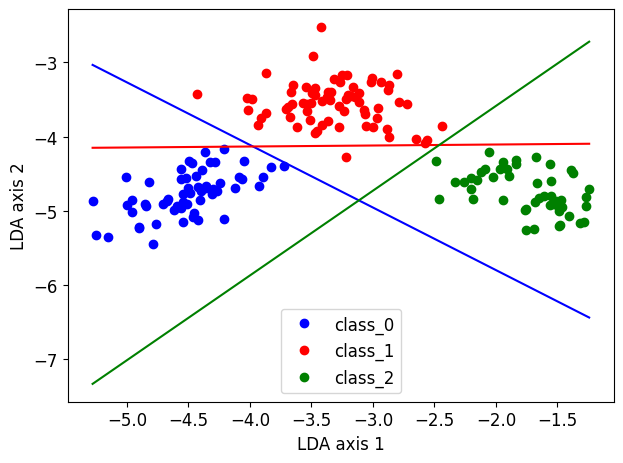

---
## Part 11 (2 points)

As noted above, `LinearDiscriminantAnalysis` provides discriminant vectors for ALL classes directly from `W` (i.e. the 'one above each class' procedure we just did is not actually necessary, but it is more intuitive). To illustrate this potential, we will fit our LDA model again, but doing a 3 class classification. As above `LinearDiscriminantAnalysis` here will NOT do dimensionality reduction again (becuase we are already in the reduced space) but instead we will hack it to get the discriminant coefficients.

* Use `LDs` as the data in `sklearn`'s `LinearDiscriminantAnalysis` which we used in HW3.1.

* For the class argument `y`, use the class vector `y`. `LinearDiscriminantAnalysis` can handle vectors of strings.

* Fit the LDA using the method `.fit()`. See note above about this fitting (no further dimensional reduction is done!)

* The attribute `.intercept_` and `coef_` provide the slope and offset of the discriminant lines. This time, they will contain THREE sets of slopes and offsets, one for each discriminant line. Follow the procedure above to plot each line.

* Plot our data colored by class (as above) and each discriminant line provided by `sklearn`.

Your plot should look like this. NOTE that each line is doesn't look quite the same as when we did 'one vs. all other' class classification, becuase these lines are dervied by a different procedure (see [here](https://scikit-learn.org/stable/modules/lda_qda.html#lda)).

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


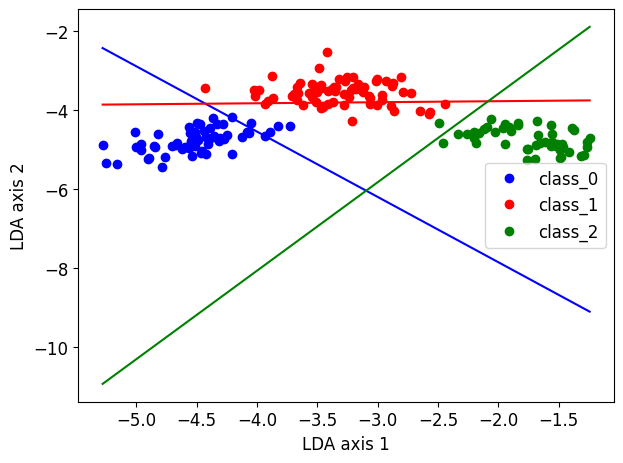

---
## Part 12 (2 points)

As in HW3.1, we can project the data from each class along the discrinant vector using the method `decision_function`.

* Using `decision_function` project the data using our fit LDA from our 3-way classification (the one we just did above). Project the data along each discriminant and plot a histogram for each class, colored appropriately.

Your plot should look like this:

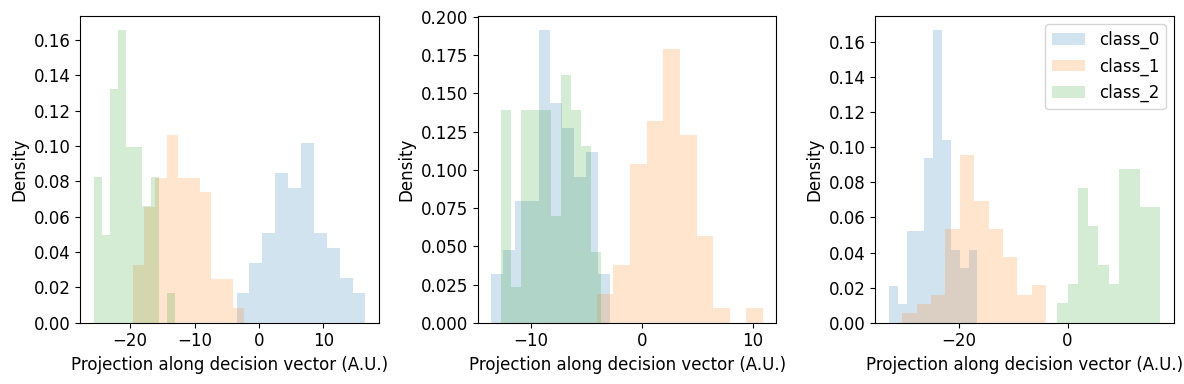

---
## Part 13 (2 points)

* Use the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.predict) method to compute the prediction accuracy of our 3-way classification. Pretty good!

---
## Part 14 (2 points)

Do a 3 class classification, as above, using `LinearDiscriminantAnalysis` on the data projected down onto the first two **scaled PCs!**

** Define `PCs_scaled` as your scaled data projected onto the first two eigenvectors from PCA on the scaled data.

* Use `PCs_scaled` as the data in `sklearn`'s `LinearDiscriminantAnalysis` which we used in HW3.1.

* For the class argument `y`, use the class vector `y`. `LinearDiscriminantAnalysis` can handle vectors of strings.

* Fit the LDA using the method `.fit()`. See note above about this fitting (no further dimensional reduction is done!)

* The attribute `.intercept_` and `coef_` provide the slope and offset of the discriminant lines. This time, they will contain THREE sets of slopes and offsets, one for each discriminant line. Follow the procedure above to plot each line.

* Plot our data colored by class (as above) and each discriminant line provided by `sklearn`.

Your plot should look like this.

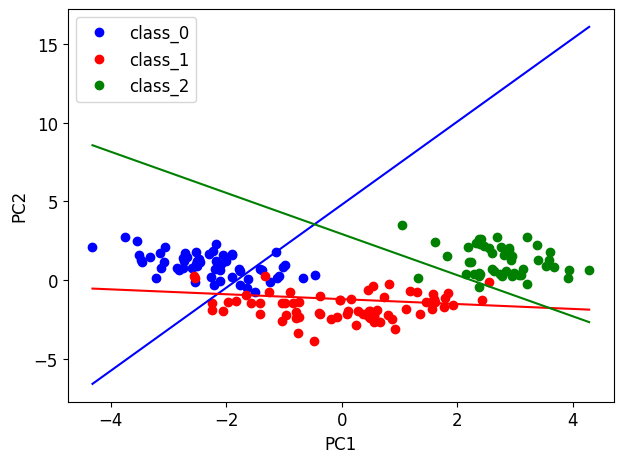

---
## Part 15 (2 points)

* Using `decision_function` project the data using our fit LDA from our 3-way classification (the one we just did above). Project the data along each discriminant and plot a histogram for each class, colored appropriately.

Your plot should look like this:

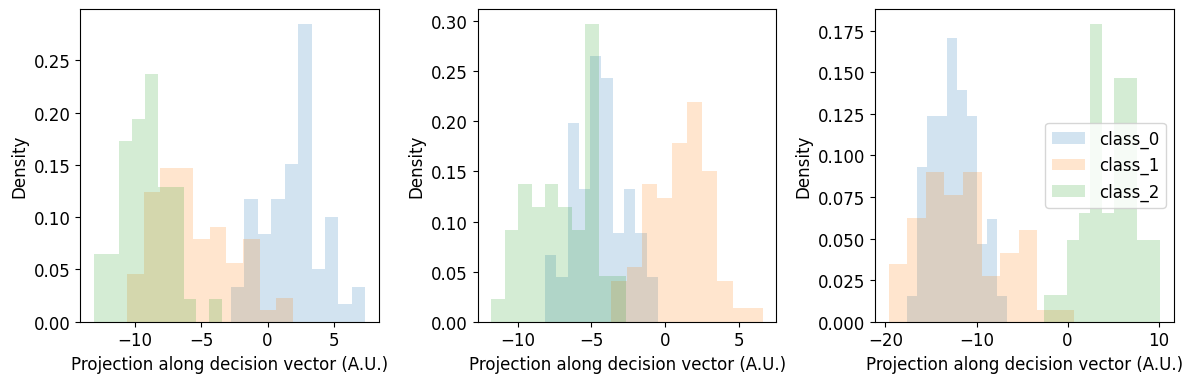

---
## Part 16 (2 points)

* Use the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.predict) method to compute the prediction accuracy of our 3-way classification. Not as good our our LDA axis!